<a href="https://colab.research.google.com/github/killian31/mva_dlts_24_denoising/blob/test_branch_name/Notebook%20-%20KS%20FS%20-%20Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Signal Processing and Deep Learning Final Project : Denoising

Authors : Killian Stennou, François Saulnier

## Revue de litérature
Cette section présente une rapide revue des méthodes proposées pour traiter ce problème, divisée en deux partie : 
- Les méthodes agissant sur le spectrogramme : A. Jansson et Al., SINGING VOICE SEPARATION WITH DEEP U-NET CONVOLUTIONAL NETWORK, ISMIR 2017
- Les méthodes agissant sur la forme d'onde  :
    - D. Stoller  et Al., WAVE-U-NET: A MULTI-SCALE NEURAL NETWORK FOR END-TO-END AUDIO SOURCE SEPARATION, ISMIR 2018
    - TAS NEt :
        - Y. Luo et Al., TaSNet: Time-Domain Audio Separation Network for Real-Time, Single-Channel
    Speech Separation, ICASSP 2018 
        - Y. Luo et Al.,  Conv-tasnet: surpassing ideal time–frequency magnitude masking
    for speech separation. IEEE/ACM Transactions on Audio, Speech, and Language Processing, 2019.

### Méthodes Spectrogramme
#### *A. Jansson et Al., Singing Voice Separation with Deep U-Net Convolutional Network, ISMIR 2017*

##### Idée générale

- Le but est d'isoler la mélodie chantée de l'accompagnement instrumental.
- Deux U-Net : 
    - un pour apprendre à masquer l'accompagnement par le masque $f(X, \Theta_v)$, qui appliqué au spectrogramme $X$ donné au modèle, donne une prédiction de la voix. La loss est $|| f(X, \Theta_v) \odot X - Y_v ||_{1, 1}$
    - un pour apprendre à masquer la voix par le masque $f(X, \Theta_i)$, qui appliqué au spectrogramme $X$ donné au modèle, donne une prédiction des instruments. La loss est $|| f(X, \Theta_i) \odot X - Y_i ||_{1, 1}$

##### Architecture

![Deep U-Net audio source separation architecture](https://camo.githubusercontent.com/ee525acc2add2198749036bf76ea627b9972f881ee844099cb301f9745b843ba/68747470733a2f2f706963342e7a68696d672e636f6d2f76322d38646638636164316466343765346134626537363533373831353636333335325f31323030783530302e6a7067)

##### Évaluation
Pour mesurer la performance, ils utilisent les fonctions suivantes: 
- Normalized Signal-To-Distortion Ratio (NSDR) : $\text{NSDR}(S_e, S_r , S_m) = \text{SDR}(S_e, S_r )−\text{SDR}(S_m, S_r )$ où $S_e$ est le signal isolé estimé, $S_r$ est le signal isolé de référence, et $S_m$ est le signal mix (original non séparé).
- Signal-to-Interference Ratio (SIR), 
- Signal-to-Artifact Ratio (SAR)

et une évaluation subjective menée par des humains.

##### Résultats

Sur la dataset iKala, moyennes :

| | U-Net | Baseline (U-Net sans skip-con.) | Chimera (ex-SOTA) |
| --- | --- | --- | --- |
| NSDR Vocal | **11.094** | 8.549 | 8.749 |
| NSDR Instrumental | **14.435** | 10.906 | 11.626 |
| SIR Vocal | **23.960** | 20.402 | 21.301 |
| SIR Instrumental | **21.832** | 14.304 | 20.481 |
| SAR Vocal | **17.715** | 15.481 | 15.642 |
| SAR Instrumental | **14.120** | 12.002 | 11.539 |

### Méthodes Forme d'onde
#### *D. Stoller  et Al., Wave-U-Net: A Multi-Scale Neural Network for End-to-end Audio Source Separation, ISMIR 2018*

##### Idée Generale
Adaptation du U-Net dans le domaine temporel. Leur modèle apprend directement à prédire les $K$ signaux sources qui font partie du signal mixé donné en entrée.

##### Architecture
![Wave-U-Net architecture](https://raw.githubusercontent.com/f90/Wave-U-Net/master/waveunet.png)

##### Évaluation
Ils utilisent seulement le SDR, et comparent avec le U-Net du domaine spectral, et une variante entraîné avec une loss L1 sur les magnitudes spectrales.

##### Résultats

| | M1 | M2 | M3 | M4 | M5 | M7 | U-Net | U-Net(a) |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| SDR Vocal | -0.12 | 0.05 | 0.31 | **0.65**| 0.55 | -0.23 | -0.66 | 0.51 |
| SDR Instrumental | 7.62 | 7.68 | 7.66 | **11.85** | 11.74 | 7.15 | 6.90 | 6.85 |

#### *Y. Luo et Al., TasNet: time-domain audio separation network for real-time, single-channel speech separation, ICASSP 2018* et *Y. Luo et Al.,  Conv-tasnet: surpassing ideal time–frequency magnitude masking for speech separation. IEEE/ACM Transactions on Audio, Speech, and Language Processing, 2019.*

##### Idée Générale
TasNet opère directement dans le domaine temporel à l'aide d'un modèle encodeur-décodeur.

- Encodeur : Le signal audio d'entrée est segmenté en courts morceaux (~5 ms) et transformé en une représentation non négative à l'aide d'une couche de convolution 1D.
- Module de séparation : Un réseau, basé sur des LSTM, génère des masques pour séparer les sources en estimant leur contribution respective dans la représentation encodée.
- Décodeur : Les masques sont appliqués aux représentations encodées pour reconstruire les signaux des différentes sources, directement dans le domaine temporel.

Conv-TasNet est une extension de TasNet. Il remplace les modules LSTM de TasNet par un réseau convolutif temporel, et est donc beaucoup plus rapide.

##### Architecture
**TasNet** :
![TasNet model architecture](https://ar5iv.labs.arxiv.org/html/1711.00541/assets/figures/flowchart_v2.png)
**Conv-TasNet** :
![Conv-TasNet model architecture](https://production-media.paperswithcode.com/methods/tasnet_4isUkmw.png)

##### Évaluation
Ils utilisent les métriques SI-SNR improvement (SI-SNRi : mesure la qualité de la séparation en comparant le rapport signal-bruit avant et après séparation, en prenant en compte l'invariance à l'échelle) and SDR improvement (SDRi : évalue la qualité de reconstruction en quantifiant la distorsion introduite dans les signaux séparés par rapport aux signaux de référence)

##### Résultats
| Méthode                 | SI-SNRi (dB)      | SDRi (dB)       |
|-------------------------|-------------------|-----------------|
| uPIT-LSTM               | -                 | 7.0             |
| TasNet-LSTM             | 7.7               | 8.0             |
| DPCL++                  | 10.8              | -               |
| DANet                   | 10.5              | -               |
| uPIT-BLSTM-ST           | -                 | 10.0            |
| TasNet-BLSTM            | 10.8              | 11.1            |
| Conv-TasNet             | **15.3**          | **15.6**        |



## Librairies utilisées

In [ ]:
!pip install pystoi


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [195]:
import numpy as np
import matplotlib.pylab as plt
import scipy
import IPython.display as ipd
from scipy.signal import resample
import os
from torch.utils.data import Dataset
import torchaudio
import torch
from Conv_TasNet_Pytorch.Conv_TasNet import ConvTasNet
from Conv_TasNet_Pytorch.SI_SNR import SI_SNR
from pesq import pesq_batch
from itertools import permutations
from pesq import pesq
from pystoi import stoi
from tqdm import tqdm
from batch_pystoi import stoi as stoi_batch
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.optim import Adam
import matplotlib.pyplot as plt

## Chargement des données

### Télécharger les données

In [3]:
!mkdir data
# download denoising data
!wget -O data/denoising.zip https://cloud.leviia.com/s/ZnIy.3xerJBY8PDKNrBL/download?path=%2FProjets%2FAudio%2Fdenoising
# download voice_origin data
!wget -O data/voice_origin.zip https://cloud.leviia.com/s/ZnIy.3xerJBY8PDKNrBL/download?path=%2FProjets%2FAudio%2Fvoice_origin
# unzip all files
!unzip -qq -o data/denoising.zip -d data/
!unzip -qq -o data/voice_origin.zip -d data/
# unzip denoising folders
!unzip -qq data/denoising/test.zip -d data/denoising/
!echo "Unzipped denoising/test.zip"
!unzip -qq data/denoising/train.zip -d data/denoising/
!echo "Unzipped denoising/train.zip"
!unzip -qq data/denoising/train_small.zip -d data/denoising/
!echo "Unzipped denoising/train_small.zip"
# unzip voice_origin folders
!unzip -qq data/voice_origin/test.zip -d data/voice_origin/
!echo "Unzipped voice_origin/test.zip"
!unzip -qq data/voice_origin/train.zip -d data/voice_origin/
!echo "Unzipped voice_origin/train.zip"
!unzip -qq data/voice_origin/train_small.zip -d data/voice_origin/
!echo "Unzipped voice_origin/train_small.zip"
# remove all zip files
!rm data/denoising.zip
!rm data/voice_origin.zip
!rm data/denoising/test.zip
!rm data/denoising/train.zip
!rm data/denoising/train_small.zip
!rm data/voice_origin/test.zip
!rm data/voice_origin/train.zip
!rm data/voice_origin/train_small.zip
# done
!echo "Successfully downloaded and unzipped data."

--2024-12-23 18:33:18--  https://cloud.leviia.com/s/ZnIy.3xerJBY8PDKNrBL/download?path=%2FProjets%2FAudio%2Fdenoising
Résolution de cloud.leviia.com (cloud.leviia.com)… 51.83.19.200, 213.251.181.36, 46.105.50.201
Connexion à cloud.leviia.com (cloud.leviia.com)|51.83.19.200|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : non indiqué [application/zip]
Sauvegarde en : « data/denoising.zip »

data/denoising.zip      [ <=>                ] 818,09M  37,8MB/s    ds 20s     

2024-12-23 18:33:39 (40,3 MB/s) - « data/denoising.zip » sauvegardé [857833302]

--2024-12-23 18:33:40--  https://cloud.leviia.com/s/ZnIy.3xerJBY8PDKNrBL/download?path=%2FProjets%2FAudio%2Fvoice_origin
Résolution de cloud.leviia.com (cloud.leviia.com)… 213.251.181.36, 46.105.50.201, 51.83.19.200
Connexion à cloud.leviia.com (cloud.leviia.com)|213.251.181.36|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : non indiqué [application/zip]
Sauvegarde en : « dat

In [7]:
def resample_signal(signal, original_rate, target_rate):
    num_samples = int(len(signal) * target_rate / original_rate)
    resampled_signal = resample(signal, num_samples)
    return resampled_signal

In [174]:
def compute_stoi(noisy_signal, clean_signal, fs_noisy, fs_clean):
    if fs_noisy != fs_clean:
        clean_signal = resample_signal(clean_signal, fs_clean, fs_noisy)
    noisy_signal = noisy_signal / np.max(np.abs(noisy_signal))
    clean_signal = clean_signal / np.max(np.abs(clean_signal))
    stoi_value = stoi(clean_signal, noisy_signal, fs_noisy, fs_clean)
    return stoi_value

def sisnr(x, s, eps=1e-8):
    """
    calculate training loss
    input:
          x: separated signal, N x S tensor
          s: reference signal, N x S tensor
    Return:
          sisnr: N tensor
    """

    def l2norm(mat, keepdim=False):
        return torch.norm(mat, dim=-1, keepdim=keepdim)

    if x.shape != s.shape:
        raise RuntimeError(
            "Dimention mismatch when calculate si-snr, {} vs {}".format(
                x.shape, s.shape))
    x_zm = x - torch.mean(x, dim=-1, keepdim=True)
    s_zm = s - torch.mean(s, dim=-1, keepdim=True)
    t = torch.sum(
        x_zm * s_zm, dim=-1,
        keepdim=True) * s_zm / (l2norm(s_zm, keepdim=True)**2 + eps)
    return 20 * torch.log10(eps + l2norm(t) / (l2norm(x_zm - t) + eps))

def si_snr_loss(ests, egs):
    # spks x n x S
    refs = egs["voice_origin"]
    num_spks = len(refs)

    def sisnr_loss(permute):
        # for one permute
        return sum(
            [sisnr(ests[s], refs[t])
             for s, t in enumerate(permute)]) / len(permute)
        # average the value

    # P x N
    N = egs["denoising"].size(0)
    sisnr_mat = torch.stack(
        [sisnr_loss(p) for p in permutations(range(num_spks))])
    max_perutt, _ = torch.max(sisnr_mat, dim=0)
    # si-snr
    return -torch.sum(max_perutt) / N

In [181]:
class AudioDataset(Dataset):
    def __init__(self, data_path, train=True, transform=None):
        self.data_path = data_path
        self.train = train
        self.transform = transform

        subset = 'train' if train else 'test'

        self.denoising_path = os.path.join(data_path, 'denoising', subset)
        self.voice_origin_path = os.path.join(data_path, 'voice_origin', subset)

        self.denoising_files = [os.path.join(self.denoising_path, f) for f in os.listdir(self.denoising_path) if f.endswith('.wav')]
        self.voice_origin_files = [os.path.join(self.voice_origin_path, f) for f in os.listdir(self.voice_origin_path) if f.endswith('.wav')]

        assert len(self.denoising_files) == len(self.voice_origin_files), "Mismatch between denoising and voice_origin files"

        self.file_pairs = list(zip(self.denoising_files, self.voice_origin_files))

    def __len__(self):
        return len(self.file_pairs)

    def __getitem__(self, idx):
        if isinstance(idx, slice):
            raise NotImplementedError("Slicing is not supported")

        denoising_file, voice_origin_file = self.file_pairs[idx]

        denoising_waveform, denoising_sample_rate = torchaudio.load(denoising_file)
        voice_origin_waveform, voice_origin_sample_rate = torchaudio.load(voice_origin_file)

        assert denoising_sample_rate == voice_origin_sample_rate, "Sample rates do not match"

        sample = {
            'denoising': denoising_waveform.squeeze(),
            'voice_origin': voice_origin_waveform.squeeze(),
            'sample_rate': denoising_sample_rate
        }

        if self.transform:
            sample = self.transform(sample)

        return sample

In [182]:
data_path = './data'
train_dataset = AudioDataset(data_path, train=True)
test_dataset = AudioDataset(data_path, train=False)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

In [183]:
input_sample = next(iter(train_loader))
denoising_sample = input_sample['denoising']
voice_origin_sample = input_sample['voice_origin']
sample_rate = input_sample['sample_rate']
output_sample = conv_tasnet(denoising_sample)
print(f"The output is a list of {len(output_sample)} sources, as specified with num_spk={len(output_sample)} in the ConvTasNet model.")
source_1 = output_sample[0]

The output is a list of 1 sources, as specified with num_spk=1 in the ConvTasNet model.


In [184]:
ipd.Audio(source_1.detach().numpy(), rate=int(sample_rate))

In [185]:
voice_origin_sample.shape

torch.Size([1, 80000])

In [191]:
pesq_score = pesq_batch(sample_rate, voice_origin_sample.detach().numpy(), source_2.unsqueeze(0).detach().numpy(), mode='nb')
pesq_perfect = pesq_batch(sample_rate, voice_origin_sample.detach().numpy(), voice_origin_sample.detach().numpy(), mode='nb')
stoi_score = stoi_batch(source_2.unsqueeze(0).detach().numpy(), voice_origin_sample.detach().numpy(), int(sample_rate))
stoi_perfect = stoi_batch(voice_origin_sample.detach().numpy(), voice_origin_sample.detach().numpy(), int(sample_rate))
loss = si_snr_loss(output_sample, input_sample)
loss_perfect = si_snr_loss(voice_origin_sample, input_sample)
print(f"SI-SNR loss: {loss}")
print(f"SI-SNR loss for perfect reconstruction: {loss_perfect}")
print(f"PESQ score: {pesq_score}")
print(f"PESQ score for perfect reconstruction: {pesq_perfect}")
print(f"STOI score: {stoi_score}")
print(f"STOI score for perfect reconstruction: {stoi_perfect}")

SI-SNR loss: 21.552162170410156
SI-SNR loss for perfect reconstruction: -103.74203491210938
PESQ score: [1.6350436210632324]
PESQ score for perfect reconstruction: [4.548638343811035]
STOI score: [-0.01651345]
STOI score for perfect reconstruction: [1.]


## Implémentation des différents modèles

### Implémentation d'une baseline : Filtre de Wiener

In [ ]:
from scipy.signal import welch

def wiener_filter_with_snr(audio, snr, fs):
    """
    Apply Wiener filtering to denoise an audio file using SNR.

    Parameters:
        audio (ndarray): Noisy signal with shape (40000,).
        snr (float): Signal-to-Noise Ratio in dB.
        fs (float): Sampling frequency.

    Returns:
        denoised_audio (ndarray): Denoised signal with shape (40000,).
    """
    signal_power = np.mean(audio**2)
    snr = 10**(snr / 10)
    noise_power = signal_power / snr
    fft_audio = np.fft.fft(audio)
    fft_freqs = np.fft.fftfreq(len(audio), d=1/fs)
    f, psd_audio = welch(audio, fs)
    psd_audio_interp = np.interp(np.abs(fft_freqs[:len(psd_audio)]), f, psd_audio)
    psd_audio_interp = np.pad(psd_audio_interp, (0, len(audio) - len(psd_audio_interp)), mode='constant', constant_values=0)
    psd_clean = np.maximum(psd_audio_interp - noise_power, 1e-10)
    wiener_filter = psd_clean / (psd_clean + noise_power)
    filtered_fft = fft_audio * wiener_filter
    denoised_audio = np.fft.ifft(filtered_fft).real

    return denoised_audio

### Conv-TasNet

In [188]:
# Load convTasNet with the official pytorch implementation from 
# https://github.com/JusperLee/Conv-TasNet/
conv_tasnet = ConvTasNet(
    N=512, # Number of ﬁlters in autoencoder
    L=16, # Length of the ﬁlters (in samples)
    B=128, # Number of channels in bottleneck and the residual paths’ 1 × 1-conv blocks
    H=512, # Number of channels in convolutional blocks
    P=3, # Kernel size in convolutional blocks
    X=8, # Number of convolutional blocks in each repeat
    R=3, # Number of repeats
    norm="gln",
    num_spks=1,
    activate="relu",
    causal=False
)

## Entraînement

In [226]:
class WarmupScheduler:
    def __init__(self, optimizer, warmup_iters, target_lr):
        self.optimizer = optimizer
        self.warmup_iters = warmup_iters
        self.target_lr = target_lr
        self.current_iter = 0

    def step(self):
        self.current_iter += 1
        if self.current_iter <= self.warmup_iters:
            # exponentially increase the learning rate
            warmup_lr = self.target_lr * (self.current_iter / self.warmup_iters) ** 2
            for param_group in self.optimizer.param_groups:
                param_group['lr'] = warmup_lr

    def is_warmup_done(self):
        return self.current_iter >= self.warmup_iters

def train(
    model,
    train_dataloader,
    val_dataloader,
    device,
    optimizer,
    criterion,
    save_to,
    num_epochs=10,
    base_lr=0.01,
    warmup=True,
    warmup_iters=50,
    plateau=True,
    lr_patience=5,
    lr_factor=0.5,
):
    train_losses = []
    val_losses = []
    train_pesqs = []
    val_pesqs = []
    train_stois = []
    val_stois = []
    learning_rates = []
    warmup_scheduler = WarmupScheduler(optimizer, warmup_iters, base_lr)
    plateau_scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=lr_patience, factor=lr_factor, verbose=True)

    model.to(device)

    try:
        for i in range(num_epochs):
            model.train()
            train_loss = 0.0
            train_pesq = 0.0
            train_stoi = 0.0
            val_loss = 0.0
            val_pesq = 0.0
            val_stoi = 0.0

            print(f"Epoch {i+1}/{num_epochs}")
            for batch in tqdm(train_dataloader):
                batch['denoising'] = batch['denoising'].to(device)
                batch['voice_origin'] = batch['voice_origin'].to(device)
                batch['sample_rate'] = batch['sample_rate'].to(device)
                optimizer.zero_grad()
                output = model(batch['denoising'])
                loss = criterion(output, batch)
                loss.backward()
                optimizer.step()
                train_loss += loss.item()
                train_pesq += pesq_batch(batch['sample_rate'], batch['voice_origin'].detach().numpy(), output[0].unsqueeze(0).detach().numpy(), mode='nb')[0]
                train_stoi += stoi_batch(output[0].unsqueeze(0).detach().numpy(), batch['voice_origin'].detach().numpy(), int(batch['sample_rate']))[0]
                if not warmup_scheduler.is_warmup_done() and warmup:
                    warmup_scheduler.step()
                
            train_loss /= len(train_dataloader)
            train_pesq /= len(train_dataloader)
            train_stoi /= len(train_dataloader)
            train_losses.append(train_loss)
            train_pesqs.append(train_pesq)
            train_stois.append(train_stoi)

            # Validation
            print("Validation")
            val_loss, val_pesq, val_stoi = test_model(model, val_dataloader, device, criterion)
            val_losses.append(val_loss)
            val_pesqs.append(val_pesq)
            val_stois.append(val_stoi)
            print(
                f"train_loss: {train_loss:.4f}, val_loss: {val_loss:.4f}, train_pesq: {train_pesq:.4f}, val_pesq: {val_pesq:.4f}, train_stoi: {train_stoi:.4f}, val_stoi: {val_stoi:.4f}, lr: {optimizer.param_groups[0]['lr']:.6f}"
            )

            if (warmup_scheduler.is_warmup_done() or not warmup) and plateau:
                plateau_scheduler.step(val_loss)
            learning_rates.append(optimizer.param_groups[0]['lr'])

        torch.save(model.state_dict(), save_to)

        return train_losses, val_losses, train_pesqs, val_pesqs, train_stois, val_stois, learning_rates
    except KeyboardInterrupt:
        torch.save(model.state_dict(), save_to)
        print("Model saved before exiting.")
        return train_losses, val_losses, train_pesqs, val_pesqs, train_stois, val_stois, learning_rates

def test_model(model, test_dataloader, device, criterion):
    model.eval()
    test_loss = 0.0
    test_pesq = 0.0
    test_stoi = 0.0
    with torch.no_grad():
        for batch in tqdm(test_dataloader):
            batch['denoising'] = batch['denoising'].to(device)
            batch['voice_origin'] = batch['voice_origin'].to(device)
            batch['sample_rate'] = batch['sample_rate'].to(device)
            output = model(batch['denoising'])
            loss = criterion(output, batch)
            test_loss += loss.item()
            test_pesq += pesq_batch(batch['sample_rate'], batch['voice_origin'].detach().numpy(), output[0].unsqueeze(0).detach().numpy(), mode='nb')[0]
            test_stoi += stoi_batch(output[0].unsqueeze(0).detach().numpy(), batch['voice_origin'].detach().numpy(), int(batch['sample_rate']))[0]
    test_loss /= len(test_dataloader)
    test_pesq /= len(test_dataloader)
    test_stoi /= len(test_dataloader)

    return test_loss, test_pesq, test_stoi


def plot_results(train_losses, val_losses, train_pesqs, val_pesqs, train_stois, val_stois, learning_rates):
    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    ax[0, 0].plot(train_losses, label='train loss')
    ax[0, 0].plot(val_losses, label='val loss')
    ax[0, 0].set_xlabel('Epoch')
    ax[0, 0].set_ylabel('Loss')
    ax[0, 0].set_title('Losses')
    ax[0, 0].legend()

    ax[0, 1].plot(learning_rates)
    ax[0, 1].set_xlabel('Epoch')
    ax[0, 1].set_ylabel('Learning rate')
    ax[0, 1].set_title('Learning rate')
    
    ax[1, 0].plot(train_pesqs, label='train PESQ')
    ax[1, 0].plot(val_pesqs, label='val PESQ')
    ax[1, 0].set_xlabel('Epoch')
    ax[1, 0].set_ylabel('PESQ')
    ax[1, 0].set_title('PESQ')
    ax[1, 0].legend()

    ax[1, 1].plot(train_stois, label='train STOI')
    ax[1, 1].plot(val_stois, label='val STOI')
    ax[1, 1].set_xlabel('Epoch')
    ax[1, 1].set_ylabel('STOI')
    ax[1, 1].set_title('STOI')
    ax[1, 1].legend()

    plt.show()


def hear_examples(model, input_sample, device):
    model.to(device)
    model.eval()
    with torch.no_grad():
        denoising_sample = input_sample['denoising'].to(device)
        voice_origin_sample = input_sample['voice_origin'].to(device)
        sample_rate = input_sample['sample_rate'].to(device)
        output_sample = model(denoising_sample)
        source = output_sample[0]
        ipd.display(ipd.Audio(source.detach().numpy(), rate=int(sample_rate)))

In [227]:
model = ConvTasNet(
    N=512, # Number of ﬁlters in autoencoder
    L=16, # Length of the ﬁlters (in samples)
    B=128, # Number of channels in bottleneck and the residual paths’ 1 × 1-conv blocks
    H=512, # Number of channels in convolutional blocks
    P=3, # Kernel size in convolutional blocks
    X=8, # Number of convolutional blocks in each repeat
    R=3, # Number of repeats
    norm="gln",
    num_spks=1,
    activate="relu",
    causal=False
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
base_lr = 0.05
optimizer = Adam(model.parameters(), lr=base_lr, weight_decay=1e-5)
criterion = si_snr_loss
num_epochs = 10
save_to = 'conv_tasnet_1.pth'
plateau = True
lr_patience = 3 
lr_factor = 0.5
warmup = True
warmup_iters = 50
batch_size = 1

mini_train_dataset = torch.utils.data.Subset(train_dataset, range(1))
mini_test_dataset = torch.utils.data.Subset(test_dataset, range(1))

train_loader = torch.utils.data.DataLoader(mini_train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(mini_test_dataset, batch_size=batch_size, shuffle=False)

In [228]:
train_losses, val_losses, train_pesqs, val_pesqs, train_stois, val_stois, learning_rates = train(
    model,
    train_loader,
    test_loader,
    device,
    optimizer,
    criterion,
    save_to,
    num_epochs=num_epochs,
    base_lr=base_lr,
    warmup=warmup,
    warmup_iters=warmup_iters,
    plateau=plateau,
    lr_patience=lr_patience,
    lr_factor=lr_factor
)

Epoch 1/10






100%|██████████| 1/1 [00:08<00:00,  8.32s/it]


Validation






100%|██████████| 1/1 [00:03<00:00,  3.29s/it]


train_loss: 34.2408, val_loss: 1.5461, train_pesq: 1.2302, val_pesq: 1.2774, train_stoi: 0.3376, val_stoi: 0.4489, lr: 0.000020
Epoch 2/10






100%|██████████| 1/1 [00:07<00:00,  7.89s/it]


Validation






100%|██████████| 1/1 [00:03<00:00,  3.29s/it]


train_loss: 0.1942, val_loss: 1.5178, train_pesq: 1.3994, val_pesq: 1.2768, train_stoi: 0.5253, val_stoi: 0.4490, lr: 0.000080
Epoch 3/10






100%|██████████| 1/1 [00:08<00:00,  8.22s/it]


Validation






100%|██████████| 1/1 [00:03<00:00,  3.78s/it]


train_loss: 0.1622, val_loss: 1.3745, train_pesq: 1.3986, val_pesq: 1.2734, train_stoi: 0.5254, val_stoi: 0.4493, lr: 0.000180
Epoch 4/10






100%|██████████| 1/1 [00:09<00:00,  9.07s/it]


Validation






100%|██████████| 1/1 [00:04<00:00,  4.56s/it]


train_loss: 0.0001, val_loss: 1.0183, train_pesq: 1.3947, val_pesq: 1.2653, train_stoi: 0.5258, val_stoi: 0.4502, lr: 0.000320
Epoch 5/10




  0%|          | 0/1 [00:07<?, ?it/s]

Model saved before exiting.


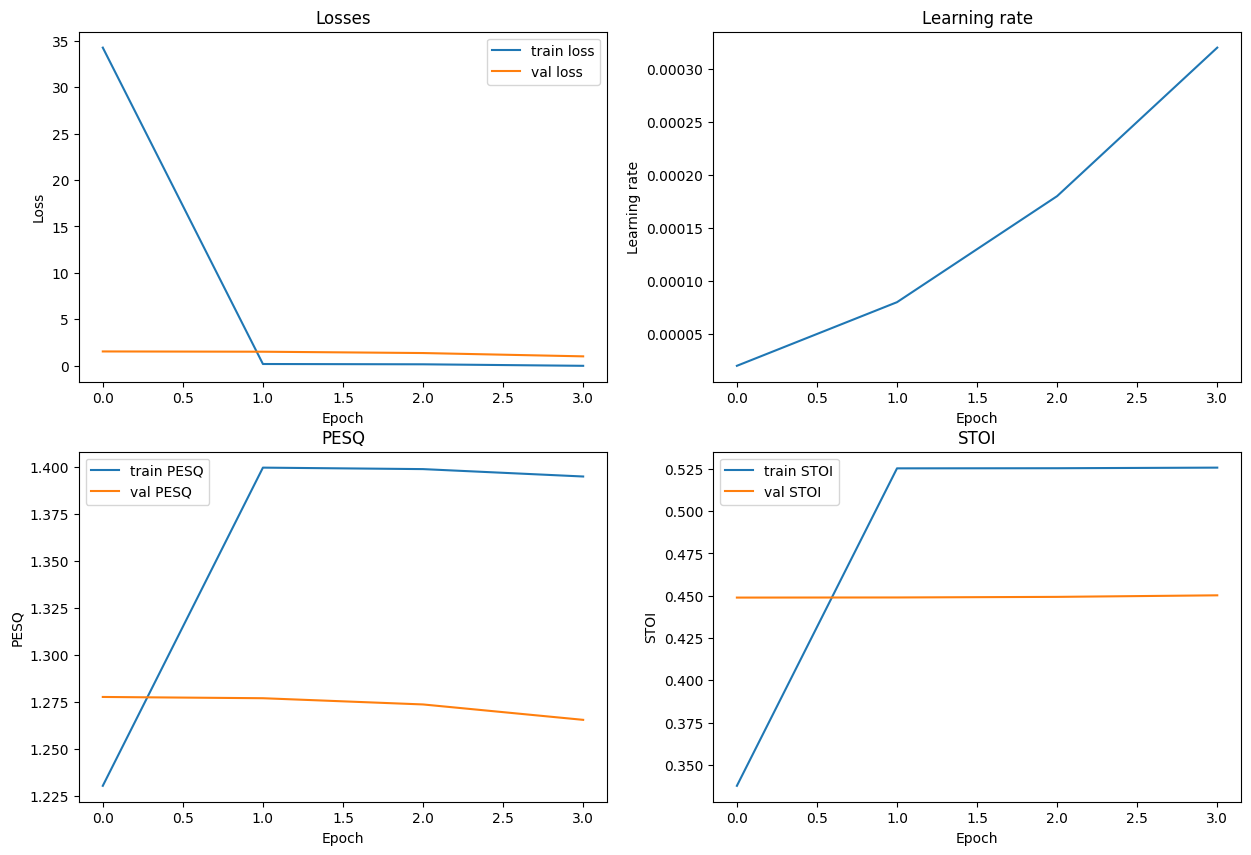

In [229]:
plot_results(train_losses, val_losses, train_pesqs, val_pesqs, train_stois, val_stois, learning_rates)